### 지도학습 절차

- 지도학습 : 목표변수(Y)와 설명변수(X)의 관계를 학습해서, 새로운 X가 들어올 때, Y를 예측 / 분류

- 지도학습의 절차 6단계:
  1. 데이터 핸들링 (데이터 불러오기 / 파생변수 생성 / 층별화) : 데이터 구조적인 관점에서 학습을 수행할 수 있는 데이터셋을 구성하는 과정

  2. 학습에 사용될 목표변수(Y)와 설명변수(X)를 설정
    - 유의사항 : 사용되는 X는 새로 들어올 데이터에 대한 값으로 지정 ex. 신규고객 이탈 예측을 할 때 구매횟수와 방문횟수를 넣으면 안 됨.

  3. 학습 데이터(Train Set)와 검증 데이터(Test Set)분할
    - 검증 데이터(Test Set)는 학습에 참여하지 않는다! (교차검증에서 Validation Set과는 다른 개념)

  4. 학습을 수행 (Modeling)
    - 특성공학 (결측값 처리 / Encoding / Scaling ...) -> Pipe Line을 이용해서
    - 학습 (알고리즘)

  5. 학습된 모델 평가
    - 학습 능력 평가
    - 일반화 능력 평가

  6. 새로운 데이터를 적용
    - 학습된 모델을 파일형태로 추출 -> Web, App, System에 넣을 수 있는 형태로 저장 

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

- 사용한 데이터 (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [2]:
# 데이터 불러오기
df1 = pd.read_csv('diabetes.csv')
print(df1.shape)
print(df1.info())
print(df1.head())
print(df1.tail())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2         

In [3]:
# 환자의 건강 관련 정보를 입력했을 때, 당뇨병에 걸릴지 말지에 대한 판별 모델 생성
# 1) 데이터 핸들링
df1['Outcome'].unique()

array([1, 0], dtype=int64)

In [4]:
# 2) 목표변수 / 설명변수 설정
X = df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df1['Outcome'] # Y값에는 결측치가 존재해서는 안됨

In [10]:
Y.isnull().sum() # 만약 결측치가 존재한다면 전처리 필요

0

In [5]:
# 3) 학습데이터와 검증데이터를 분할
# pip install scikit-learn
from sklearn.model_selection import train_test_split

In [6]:
train_test_split(X,Y) # X 데이터의 학습, 검증 데이터 & Y 데이터의 학습, 검증데이터 4개로 분리됨

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 466            0       74             52             10       36  27.8   
 187            1      128             98             41       58  32.0   
 207            5      162            104              0        0  37.7   
 178            5      143             78              0        0  45.0   
 632            2      111             60              0        0  26.2   
 ..           ...      ...            ...            ...      ...   ...   
 271            2      108             62             32       56  25.2   
 200            0      113             80             16        0  31.0   
 182            1        0             74             20       23  27.7   
 290            0       78             88             29       40  36.9   
 65             5       99             74             27        0  29.0   
 
      DiabetesPedigreeFunction  Age  
 466                     0.269   22  
 187                  

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1234)
# train_test_split()에 별도의 옵션을 지정하지 않으면 75:25로 학습:검증 분할됨
# random_state을 지정해야 같은 결과가 나옴

In [11]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

=> X에도 결측치가 없는 데이터이지만, 추후 새로 들어올 데이터에 결측치가 존재할 수 있음

In [33]:
# 4) 학습 수행
from sklearn.tree import DecisionTreeClassifier

In [35]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train) # 학습 수행

DecisionTreeClassifier()

In [36]:
# 5) 성능 확인
from sklearn.metrics import accuracy_score
# 정확도 : 전체 데이터 중 얼만큼 정확히 분류했는지 비율

In [37]:
Y_train_pred = model.predict(X_train)

In [38]:
Y_test_pred = model.predict(X_test)

In [39]:
print('학습 정확도 : ', accuracy_score(Y_train, Y_train_pred)) # 여러 알고리즘에 대한 모델을 비교할 때 확인해야 함
print('검증 정확도 : ', accuracy_score(Y_test, Y_test_pred))

학습 정확도 :  1.0
검증 정확도 :  0.7135416666666666


### 과적합(Overfitting)

- 과적합 : 학습 데이터에 대해서는 Model이 높은 성능을 나타내지만, 검증데이터에서는 성능이 낮게 나오는 현상
- 해결 : 특성공학을 통해 데이터를 더 깔끔하게 생성

### 특성공학(Feature Engineering)
- **특성공학** : 학습의 목적에 맞게(학습이 잘 수행될 수 있도록) 데이터를 깔끔하게 다듬는 작업
- 대표적 기법 : 
  1. Scaling & Encoding : 숫자 데이터의 스케일을 맞추거나, 문자 데이터를 숫자로 변환하여 학습에 사용
  2. Imputation : 데이터 상에 존재하는 결측값에 대해 다른 값으로 대치 (새로 들어오는 데이터가 결측일 수도 있기 때문에)
  3. Cross Validation (교차검증): 학습데이터를 여러 단계로 나누어 분할하여 학습
  4. Hyper Parameter Tuning : 학습 알고리즘 내 존재하는 수학적 구조나 학습에 발생하는 구조, 함수들을 사용자가 통제
  5. Imbalanced Data Sampling : 목표변수의 비율이 깨져있는 데이터를 맞추어 학습
  6. Feature Selection : 목표변수에 가장 영향이 있는 인자를 사용자가 지정한 만큼 선택해서 학습
  7. PCA : 데이터의 차원을 줄이거나 특성을 재구성하여 학습

- Scikit Learn에서 특성공학 기법과 학습을 동시에 수행할 수 있게 Pipe Line 구성하여 학습을 수행

In [14]:
# 4) 학습 수행
from sklearn.pipeline import make_pipeline # 특성공학 + 학습
from sklearn.impute import SimpleImputer # 결측값 단순 대치 기법
# from sklearn.preprocessing import OneHotEncoder # 원핫인코딩(범주형변수 -> 수치형 변수)
from sklearn.tree import DecisionTreeClassifier # 학습 알고리즘(의사결정나무)
# from sklearn.linear_model import LogisticRegression # 로지스틱회귀
# from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 

In [15]:
# 파이프라인 구조 설계
model_pipe = make_pipeline(SimpleImputer(strategy='median'), DecisionTreeClassifier())
model_pipe
# 결측값이 발생했을 때, 중앙값으로 대치한 다음 의사결정나무 알고리즘으로 학습
# X에 수치형과 문자형이 모두 있는 경우 별도의 파이프로 만들어야 함
# 데이터 유형별 파이프라인 병렬처리
#numeric_list = X.describe().columns
#category_list = X.describe(include='object').columns
#pipe1 = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler())
#pipe2 = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))
#prepro_pipe = make_column_transformer((pipe1, numeric_list), (pipe2, category_list))

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [25]:
from sklearn.model_selection import GridSearchCV

#### 의사결정나무의 하이퍼파라미터
- criterion : 분할 기준
- max_depth : 트리의 최대 깊이(너무 깊으면 과적합 발생 가능)
- min_samples_split : 노드 분할을 위한 최소 샘플 수
- max_leaf_nodes : 리프 노드의 최대 개수
- ...
- => 모델에 따라 하이퍼파라미터가 다름! 또한 너무 많은 튜닝을 해버리면 노트북 자원에 따라 시간이 너무 오래 걸릴 수 있음

In [26]:
# 하이퍼파라미터 튜닝 및 교차검증
hyperparam = {'decisiontreeclassifier__criterion': ['gini'],
             'decisiontreeclassifier__max_depth' : range(5, 10)}

grid_model1 = GridSearchCV(model_pipe, param_grid = hyperparam, cv=3,
                          scoring='f1', n_jobs=-1)
grid_model1.fit(X_train, Y_train)
best_model1 = grid_model1.best_estimator_

In [28]:
best_model1

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5))])

In [27]:
# 5) 평가
Y_train_pred = best_model1.predict(X_train) # 학습 데이터의 예측값 계산
Y_test_pred = best_model1.predict(X_test) # 검증데이터의 예측값 계산

In [18]:
from sklearn.metrics import classification_report

In [29]:
# 학습 성능 평가
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       379
           1       0.81      0.75      0.78       197

    accuracy                           0.85       576
   macro avg       0.84      0.83      0.83       576
weighted avg       0.85      0.85      0.85       576



In [30]:
# 일반화 성능 평가
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       121
           1       0.62      0.56      0.59        71

    accuracy                           0.71       192
   macro avg       0.69      0.68      0.69       192
weighted avg       0.71      0.71      0.71       192



In [21]:
# 6) 생성한 모델을 파일형태로 저장
import pickle

In [31]:
pickle.dump(best_model1, open('model.sav', 'wb'))

In [32]:
# 저장된 모델 불러오기
pickle.load(open('model.sav', 'rb'))

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5))])

### 모델 평가 지표(분류모델)

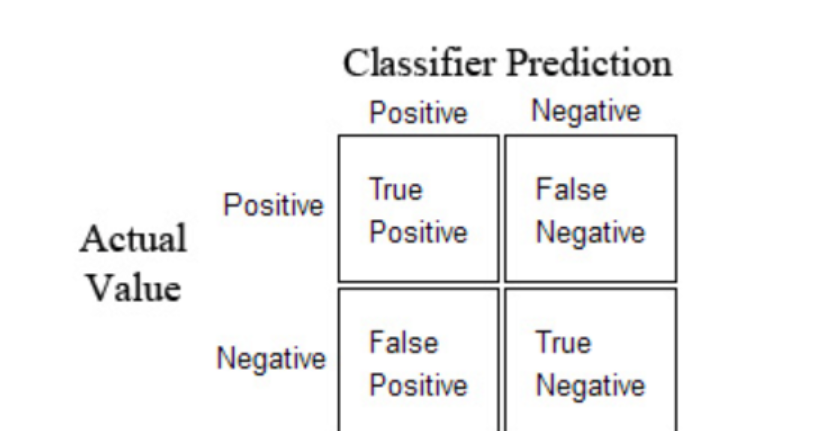

- **정확도 Accuracy** = 예측결과가 동일한 데이터 수 / 전체 예측 데이터 수
  - 클래스가 균형을 이룰 때 사용하는 지표 
  - 모든 클래스가 동등한 중요도를 가질 때 확인하는 지표(이탈이 더 중요하기 때문에 정확도만을 보고 판단해서는 안됨)
  - 목표변수(Y)가 불균형한(Imbalanced)데이터인 경우엔 적합한 평가지표로 사용하기 어렵다

- **오차 행렬 Confusion Matrix** 
  - **정밀도 Precision**  : TP / (TP + FP)
    - 예측을 Positive로 한 대상 중, 예측값과 실제값이 Positive로 일치한 데이터의 비율
    - 문제가 없는 데이터를 문제가 있다고 잘못 판단할 때 발생하는 이슈를 나타내는 지표(중요한 메일이 스팸으로 분류되는 경우)
    - False Positive를 낮추는 데 초점 / 예 - 스팸메시지 분류기

  - **재현율 Recall** : TP / (TP + FN)
    - 실제값이 Positive인 대상 중 예측값과 실제값이 Positive로 일치하는 데이터의 비율
    - 민감도 (Sensitivity) 또는 TPR (True Positive Rate)로 불림
    - 실제 문제가 있는 데이터를 문제가 없다고 잘못 판단할 때 발생하는 이슈를 나타내는 지표
    - False Negative를 낮추는 데 초점 / 예 - 암 진단 (실제로 암인데, 정상으로 분류하는 경우)
    - 이탈 고객인데, 정상 고객으로 분류하는 경우

  - **F1-Score** : 2 x 정밀도 x 재현율 / (정밀도 + 재현율)
    - 정밀도와 재현율이 균형이 필요한 경우에 사용
    - 정밀도와 재현율 둘 다 한쪽으로 치우치지 않을 때, 높은 값을 나타내는 지표

### 과제 2-1. 팀 별로 정해진 모델에 맞게 분류 모델 만들어오기
- 모델의 장단점 및 해당 모델에 맞는 특성공학 기법을 정리한 뒤, 해당 모델에 맞는 특성공학 기법을 적용해야 함
- 사용할 데이터 : 오늘 수업 때 배운 diabetes.csv
- 1조 : 랜덤포레스트, 2조 : Gradient Boosting, 3조 : 로지스틱 회귀

### 과제 2-2. (기본) 5. 회귀모델 만들기 예습